## Kickstarter : What makes a project successful?

### Introduction
The range of funding options for projects created by individuals and small companies has expanded considerably. In addition to savings, bank loans, friends and family funding and other traditional options, crowdfunding has become a popular alternative. 
Kickstarter; an all-or nothing crowdfunding platform where the project is only funded if it reaches the goal amount, otherwise no money is given by the backers to the project; is becoming increasingly popular amongst individuals as a source for gaining capital for their ventures.

A lot of factors contribute to successfully gain funding for a project on Kickstarter. My aim through this project is to find out features that would effictively predict whether a venture will get funding or not. For this purpose i have used logistic regression, random forests and PCA.

### Dataset
I downloaded the dataset online through Kaggle "link" in a .csv format. The dataset contains data on all projects hosted on Kickstarter between the company's launch in April 2009 to December 2018.

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import calendar
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support
import itertools
import time


In [54]:
df = pd.read_csv("C://Users//HP//Downloads//ks-projects-201801.csv")

In [55]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df.country.nunique()

23

#### Country
It is important to know how many countries are projects set in and whether being in a specific country provides a higher chance of success. It is possible that people from developed countries are more readily to fund projects than people from developing countries.

In [56]:
a = df.launched[0]

In [57]:
import datetime

In [58]:
df['month_dead'] = pd.DatetimeIndex(df['deadline']).month
df['month_launch'] = pd.DatetimeIndex(df['launched']).month
df['year'] = pd.DatetimeIndex(df['deadline']).year


In [59]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,month_dead,month_launch,year
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,10,8,2015
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,11,9,2017
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2,1,2013
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,4,3,2012
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,8,7,2015


In [60]:
df['time_period'] = (30*(df['month_dead']-df['month_launch']))

#### Date
The project deadline and launched dates are stored in unix time, and need to be converted to datetime. Because they have been converted from unix, all times are in UTC/GMT. 

In [61]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,month_dead,month_launch,year,time_period
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,10,8,2015,60
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,11,9,2017,60
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2,1,2013,30
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,4,3,2012,30
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,8,7,2015,30


In [62]:
df['day_dead'] = pd.DatetimeIndex(df['deadline']).weekday_name
df['day_launch'] = pd.DatetimeIndex(df['launched']).weekday_name

In [61]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,country,usd pledged,usd_pledged_real,usd_goal_real,month_dead,month_launch,year,time_period,day_dead,day_launch
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,...,GB,0.0,0.0,1533.95,10,8,2015,60,Friday,Tuesday
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,...,US,100.0,2421.0,30000.00,11,9,2017,60,Wednesday,Saturday
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,...,US,220.0,220.0,45000.00,2,1,2013,30,Tuesday,Saturday
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,...,US,1.0,1.0,5000.00,4,3,2012,30,Monday,Saturday
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,...,US,1283.0,1283.0,19500.00,8,7,2015,30,Saturday,Saturday


In [63]:
df['pledge_per_backer'] = round(df['usd_pledged_real']/df['backers'],2)
df['name_length'] = len(df['name'])

In [63]:
df.isna().sum()

ID                       0
name                     4
category                 0
main_category            0
currency                 0
deadline                 0
goal                     0
launched                 0
pledged                  0
state                    0
backers                  0
country                  0
usd pledged           3797
usd_pledged_real         0
usd_goal_real            0
month_dead               0
month_launch             0
year                     0
time_period              0
day_dead                 0
day_launch               0
pledge_per_backer    52527
name_length              0
dtype: int64

In [64]:
#replacing null values with 0
df['usd pledged'].fillna(0, inplace=True)

In [16]:
df.isna().sum()

ID                       0
name                     4
category                 0
main_category            0
currency                 0
deadline                 0
goal                     0
launched                 0
pledged                  0
state                    0
backers                  0
country                  0
usd pledged              0
usd_pledged_real         0
usd_goal_real            0
month_dead               0
month_launch             0
year                     0
time_period              0
day_dead                 0
day_launch               0
pledge_per_backer    52527
dtype: int64

In [65]:
# Dropping projects which are not successes or failures
df = df[df['state'].isin(['successful', 'failed'])]

We are interested in assessing the success or the failure of the project, therefore we are not going to be dealing with other target variables like "cancelled"

In [66]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,month_dead,month_launch,year,time_period,pledge_per_backer,name_length
count,3.316750e+05,3.316750e+05,3.316750e+05,331675.000000,3.316750e+05,3.316750e+05,3.316750e+05,331675.000000,331675.000000,331675.000000,331675.000000,293019.00,331675.0
mean,1.074271e+09,4.425157e+04,1.058400e+04,116.381581,7.679704e+03,9.943461e+03,4.151000e+04,6.758483,6.416163,2014.244522,10.269601,inf,378661.0
std,6.191924e+08,1.117917e+06,1.015917e+05,965.427268,8.318326e+04,9.673293e+04,1.108930e+06,3.315202,3.306989,1.919265,87.401111,NaN,0.0
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,1.000000,1.000000,2009.000000,-330.000000,0.45,378661.0
25%,5.371725e+08,2.000000e+03,5.000000e+01,2.000000,2.500000e+01,5.000000e+01,2.000000e+03,4.000000,4.000000,2013.000000,30.000000,25.74,378661.0
50%,1.074573e+09,5.000000e+03,7.820000e+02,15.000000,5.010000e+02,7.880000e+02,5.000000e+03,7.000000,6.000000,2014.000000,30.000000,49.00,378661.0
75%,1.609844e+09,1.500000e+04,4.657000e+03,63.000000,3.417000e+03,4.608000e+03,1.500000e+04,10.000000,9.000000,2016.000000,30.000000,84.72,378661.0
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08,12.000000,12.000000,2018.000000,120.000000,inf,378661.0


In [70]:
print("\nThe total amount of money that projects have targeted to raise is ${0:,.0f}".format(df.usd_goal_real.sum()))
print("The total amount of money pledged by backers to successful projects is ${0:,.0f}".format(sum(df.loc[df['state'] == 'successful'].usd_pledged_real)))
print("The total amount of money pledged by backers to failed projects is ${0:,.0f}".format(sum(df.loc[df['state'] == 'failed'].usd_pledged_real)))

print("\nThe total number of successful or failed projects launched on Kickstarter is: {0:,}".format(len(df)))
print("The total number of projects which were successfully funded is: {0:,}".format(len(df.loc[df['state'] == 'successful'])))
print(f"The proportion of completed projects which were successfully funded is: {int(round((len(df.loc[df['state'] == 'successful'])/len(df))*100,0))}%")

print("\nThe mean project fundraising goal is ${0:,.0f}".format(df.usd_goal_real.mean()))
print("The mean amount pledged per successful project is ${0:,.0f}".format(df.loc[df['state'] == 'successful'].usd_pledged_real.mean()))
print("The mean amount pledged per failed project is ${0:,.0f}".format(df.loc[df['state'] == 'failed'].usd_pledged_real.mean()))
      
print("\nThe mean number of backers per project is", int(round(df.backers.mean(),0)))
print("The mean number of days a campaign is run for is", int(round(df.time_period.mean(),0)))


The total amount of money that projects have targeted to raise is $13,767,829,762
The total amount of money pledged by backers to successful projects is $3,036,889,046
The total amount of money pledged by backers to failed projects is $261,108,466

The total number of successful or failed projects launched on Kickstarter is: 331,675
The total number of projects which were successfully funded is: 133,956
The proportion of completed projects which were successfully funded is: 40%

The mean project fundraising goal is $41,510
The mean amount pledged per successful project is $22,671
The mean amount pledged per failed project is $1,321

The mean number of backers per project is 116
The mean number of days a campaign is run for is 10


We can conclude from the summary statistics that successful projects have realistic goals and have more people backing it than failed projects. 
Projects that are not able to get funding run for a shorter duration than their successful counterparts. 

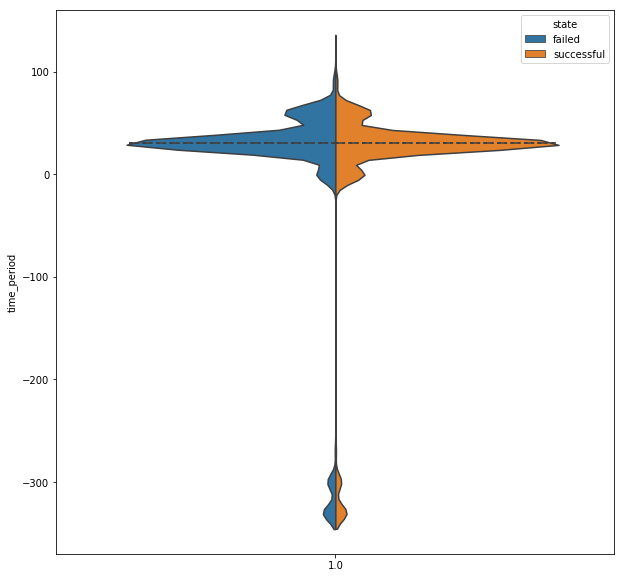

In [78]:
plt.figure(figsize=(10,10))
sns.violinplot(x=np.ones(331675), y="time_period", hue="state", data=df, split=True, inner="quart")

In [ ]:
means = ["time_period", "usd_goal_real", "usd_pledged_real", "pledge_per_backer", "backers"]

plt.figure(figsize=(10,10))
sns.swarmplot(x=np.ones(331675), y="time_period", hue="state", data=df)
plt.xticks(rotation=90)

Text(0.5, 0, '')

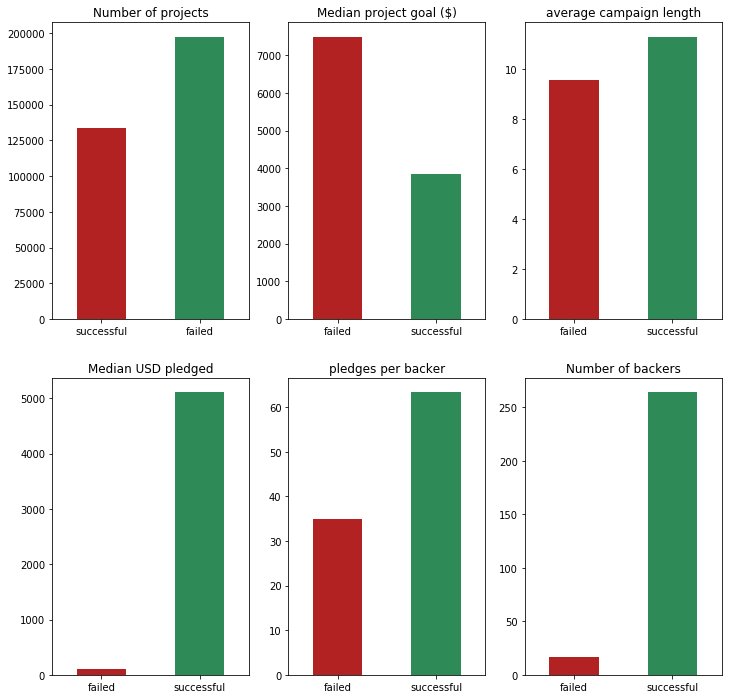

In [13]:
## Plotting and exploring variables and data
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12,12))
df['state'].value_counts(ascending=True).plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'], rot=0)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('state').usd_goal_real.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'], rot=0)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('state').time_period.mean().plot(kind='bar', ax=ax3, color=['firebrick', 'seagreen'], rot=0)
ax3.set_title('average campaign length')
ax3.set_xlabel('')


df.groupby('state').usd_pledged_real.median().plot(kind='bar', ax=ax4, color=['firebrick', 'seagreen'], rot=0)
ax4.set_title('Median USD pledged')
ax4.set_xlabel('')


df.groupby('state').pledge_per_backer.median().plot(kind='bar', ax=ax5, color=['firebrick', 'seagreen'], rot=0)
ax5.set_title('pledges per backer')
ax5.set_xlabel('')

df.groupby('state').backers.mean().plot(kind='bar', ax=ax6, color=['firebrick', 'seagreen'], rot=0)
ax6.set_title('Number of backers')
ax6.set_xlabel('')

sucessfull campaigns have realistic small goals that run for longer days and are also backed by more people

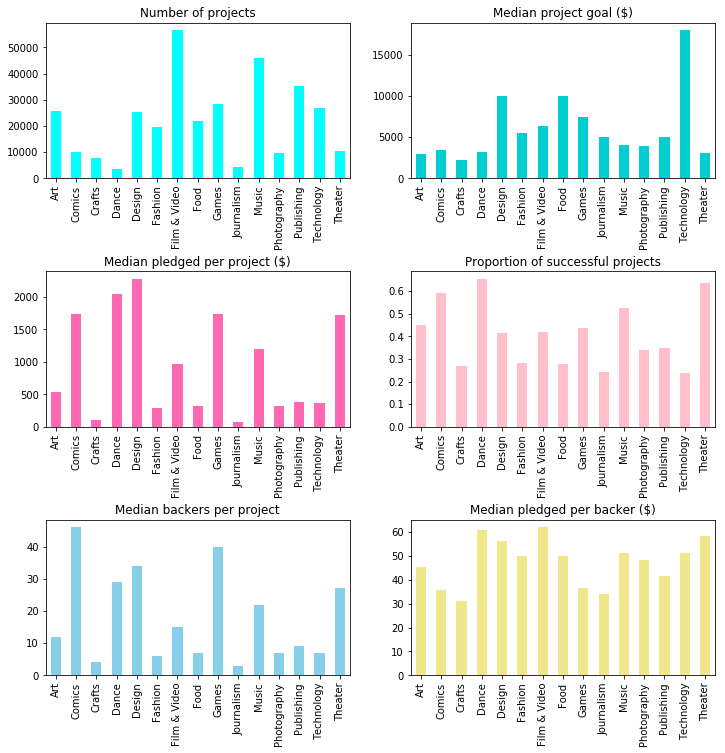

In [14]:
## plotting which categories have the most successful projects

cat_df = pd.get_dummies(df.set_index('main_category').state).groupby('main_category').sum()

# Plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12,12))

#color = cmap(np.linspace(0.1,0.8,df.category.nunique())) # Setting a colormap

df.groupby('main_category').category.count().plot(kind='bar', ax=ax1, color='cyan')
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('main_category').usd_goal_real.median().plot(kind='bar', ax=ax2, color='darkturquoise')
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('main_category').usd_pledged_real.median().plot(kind='bar', ax=ax3, color='hotpink')
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

cat_df.div(cat_df.sum(axis=1), axis=0).successful.plot(kind='bar', ax=ax4, color='pink') # Normalizes counts across rows
ax4.set_title('Proportion of successful projects')
ax4.set_xlabel('')

df.groupby('main_category').backers.median().plot(kind='bar', ax=ax5, color='skyblue')
ax5.set_title('Median backers per project')
ax5.set_xlabel('')

df.groupby('main_category').pledge_per_backer.median().plot(kind='bar', ax=ax6, color='khaki')
ax6.set_title('Median pledged per backer ($)')
ax6.set_xlabel('')

fig.subplots_adjust(hspace=0.6)
plt.show()

1) The category with the most number of projects is film and video
2) Unsuprisingly technology has the highest project goal even though dance nad theatre have the most number of successful projects


In [68]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,usd_pledged_real,usd_goal_real,month_dead,month_launch,year,time_period,day_dead,day_launch,pledge_per_backer,name_length
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,...,0.0,1533.95,10,8,2015,60,Friday,Tuesday,NaN,378661
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,...,2421.0,30000.00,11,9,2017,60,Wednesday,Saturday,161.40,378661
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,...,220.0,45000.00,2,1,2013,30,Tuesday,Saturday,73.33,378661
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,...,1.0,5000.00,4,3,2012,30,Monday,Saturday,1.00,378661
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,...,52375.0,50000.00,4,2,2016,60,Friday,Friday,233.82,378661


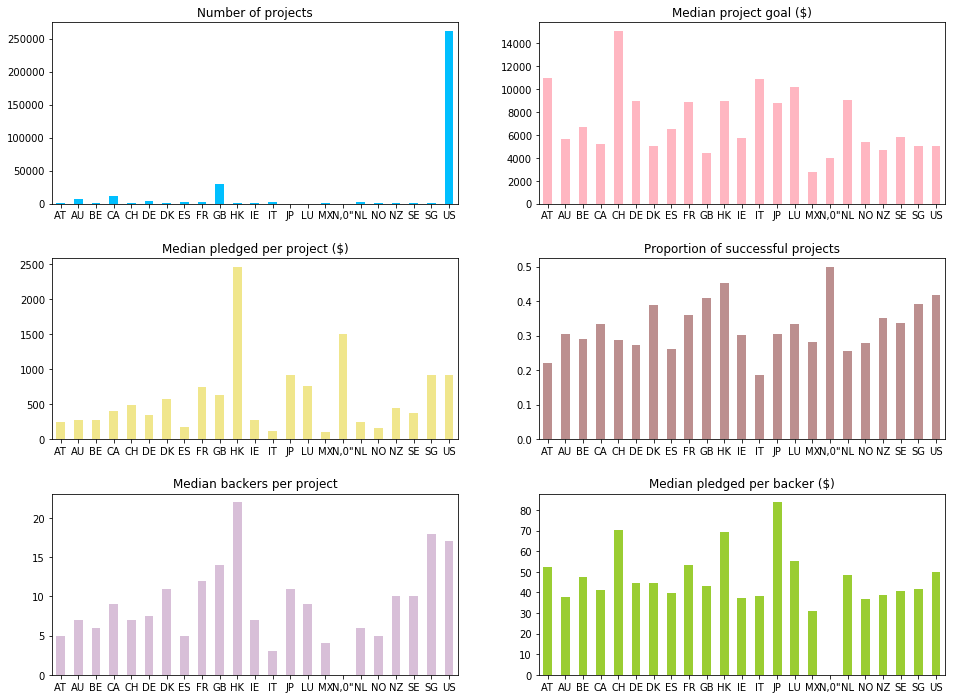

In [69]:
## determine project success based on country
country_df = pd.get_dummies(df.set_index('country').state).groupby('country').sum()

# Plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(16,12))



df.groupby('country').country.count().plot(kind='bar', ax=ax1, color='deepskyblue', rot=0)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('country').usd_goal_real.median().plot(kind='bar', ax=ax2, color='lightpink', rot=0)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('country').usd_pledged_real.median().plot(kind='bar', ax=ax3, color='khaki', rot=0)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

country_df.div(country_df.sum(axis=1), axis=0).successful.plot(kind='bar', ax=ax4, color='rosybrown', rot=0) # Normalizes counts across rows
ax4.set_title('Proportion of successful projects')
ax4.set_xlabel('')

df.groupby('country').backers.median().plot(kind='bar', ax=ax5, color='thistle', rot=0)
ax5.set_title('Median backers per project')
ax5.set_xlabel('')

df.groupby('country').pledge_per_backer.median().plot(kind='bar', ax=ax6, color='yellowgreen', rot=0)
ax6.set_title('Median pledged per backer ($)')
ax6.set_xlabel('')

fig.subplots_adjust(hspace=0.3)
plt.show()

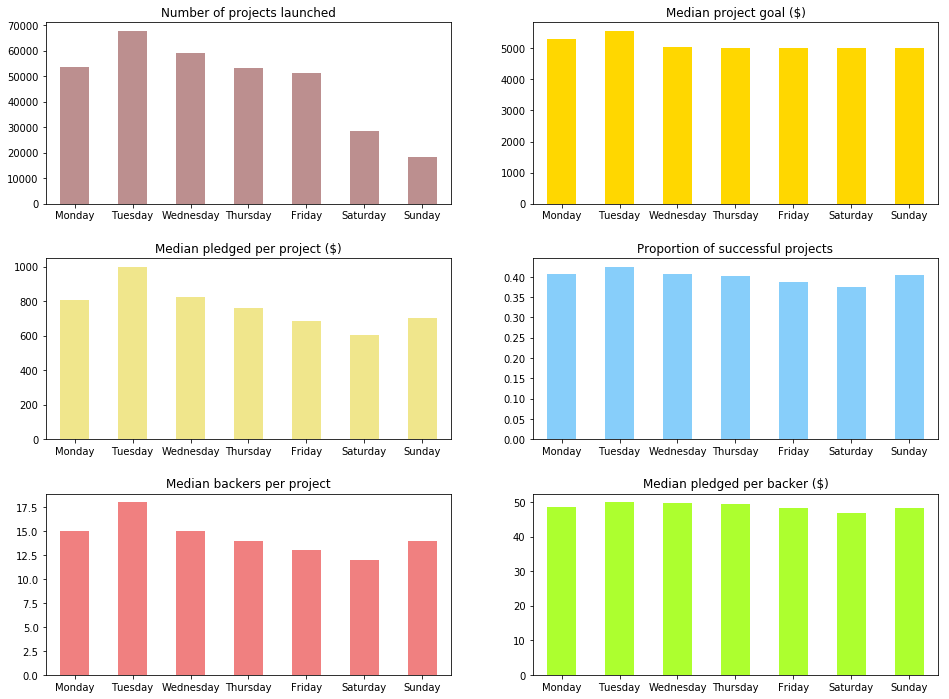

In [15]:
# best day of the week to start a project
day_df = pd.get_dummies(df.set_index('day_launch').state).groupby('day_launch').sum()

# Plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(16,12))

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df.groupby('day_launch').day_launch.count().reindex(weekdays).plot(kind='bar', ax=ax1, color='rosybrown', rot=0)
ax1.set_title('Number of projects launched')
ax1.set_xlabel('')

df.groupby('day_launch').usd_goal_real.median().reindex(weekdays).plot(kind='bar', ax=ax2, color='gold', rot=0)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('day_launch').usd_pledged_real.median().reindex(weekdays).plot(kind='bar', ax=ax3, color='khaki', rot=0)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

day_df.div(day_df.sum(axis=1), axis=0).successful.reindex(weekdays).plot(kind='bar', ax=ax4, color='lightskyblue', rot=0) # Normalizes counts across rows
ax4.set_title('Proportion of successful projects')
ax4.set_xlabel('')

df.groupby('day_launch').backers.median().reindex(weekdays).plot(kind='bar', ax=ax5, color='lightcoral', rot=0)
ax5.set_title('Median backers per project')
ax5.set_xlabel('')

df.groupby('day_launch').pledge_per_backer.median().reindex(weekdays).plot(kind='bar', ax=ax6, color='greenyellow', rot=0)
ax6.set_title('Median pledged per backer ($)')
ax6.set_xlabel('')

fig.subplots_adjust(hspace=0.3)
plt.show()

Tuesday seems like the best day to start the project.


In [16]:
## getting the data ready
df_transformed = df.drop(['backers', 'launched', 'deadline', 'usd pledged','pledged','usd_pledged_real', 'category', 'pledge_per_backer','name_length','ID','name','currency'], axis=1)
df_transformed.head()

,main_category,goal,state,country,usd_goal_real,month_dead,month_launch,year,time_period,day_dead,day_launch
0,Publishing,1000.0,failed,GB,1533.95,10,8,2015,60,Friday,Tuesday
1,Film & Video,30000.0,failed,US,30000.00,11,9,2017,60,Wednesday,Saturday
2,Film & Video,45000.0,failed,US,45000.00,2,1,2013,30,Tuesday,Saturday
3,Music,5000.0,failed,US,5000.00,4,3,2012,30,Monday,Saturday
5,Food,50000.0,successful,US,50000.00,4,2,2016,60,Friday,Friday


In [17]:
df_transformed['state'] = df_transformed['state'].replace({'failed': 0, 'successful': 1})
df_transformed = pd.get_dummies(df_transformed)


In [18]:
X_unscaled = df_transformed.drop('state', axis=1)
y = df_transformed.state

In [19]:
# Transforming standardizing the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_unscaled), columns=list(X_unscaled.columns))
X.head()

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,goal,usd_goal_real,month_dead,month_launch,year,time_period,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,...,day_dead_Thursday,day_dead_Tuesday,day_dead_Wednesday,day_launch_Friday,day_launch_Monday,day_launch_Saturday,day_launch_Sunday,day_launch_Thursday,day_launch_Tuesday,day_launch_Wednesday
0,-0.038690,-0.036049,0.977775,0.478937,0.393629,0.568991,-0.289456,-0.175204,-0.155371,-0.104355,...,-0.433416,-0.340046,-0.403738,-0.427976,-0.438578,-0.306914,-0.241591,-0.436636,1.974581,-0.465962
1,-0.012748,-0.010379,1.279416,0.781327,1.435697,0.568991,-0.289456,-0.175204,-0.155371,-0.104355,...,-0.433416,-0.340046,2.476851,-0.427976,-0.438578,3.258238,-0.241591,-0.436636,-0.506437,-0.465962
2,0.000669,0.003147,-1.435355,-1.637795,-0.648438,0.225746,-0.289456,-0.175204,-0.155371,-0.104355,...,-0.433416,2.940776,-0.403738,-0.427976,-0.438578,3.258238,-0.241591,-0.436636,-0.506437,-0.465962
3,-0.035111,-0.032924,-0.832072,-1.033015,-1.169472,0.225746,-0.289456,-0.175204,-0.155371,-0.104355,...,-0.433416,-0.340046,-0.403738,-0.427976,-0.438578,3.258238,-0.241591,-0.436636,-0.506437,-0.465962
4,0.005142,0.007656,-0.832072,-1.335405,0.914663,0.568991,-0.289456,-0.175204,-0.155371,-0.104355,...,-0.433416,-0.340046,-0.403738,2.336580,-0.438578,-0.306914,-0.241591,-0.436636,-0.506437,-0.465962


In [20]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)


In [21]:
#logistic regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [27]:
print("Logistic regression score for training set:", round(logreg.score(X_train, y_train),5))
print("Logistic regression score for test set:", round(logreg.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, y_hat_test))

Logistic regression score for training set: 0.63729
Logistic regression score for test set: 0.63742

Classification report:
              precision    recall  f1-score   support

           0       0.66      0.83      0.73     59413
           1       0.58      0.36      0.44     40090

   micro avg       0.64      0.64      0.64     99503
   macro avg       0.62      0.59      0.59     99503
weighted avg       0.63      0.64      0.61     99503



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC: 0.67039


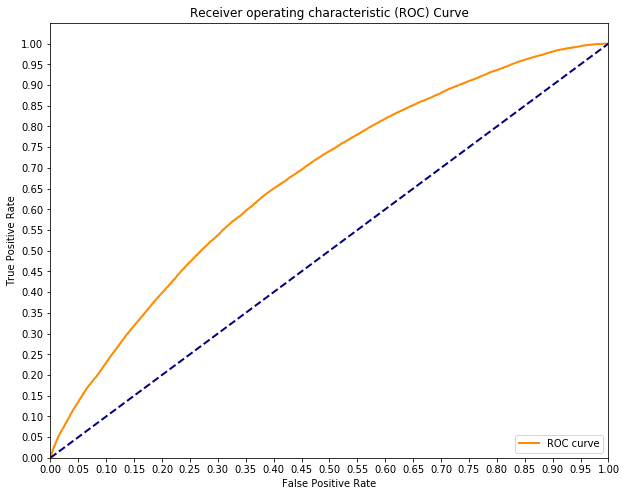

In [28]:
# Plotting the AUC-ROC
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC:', round(auc(fpr, tpr),5))

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [29]:
#PCA
pca = PCA()
pca.fit_transform(X)
explained_var = np.cumsum(pca.explained_variance_ratio_)

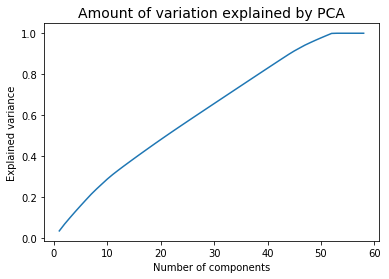

In [30]:
plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Amount of variation explained by PCA', fontsize=14)
plt.xlabel('Number of components')
plt.ylabel('Explained variance');

After 50 component the explained variance does not change

In [31]:
print("Number of components explaining 80% of variance:", np.where(explained_var > 0.8)[0][0])
print("Number of components explaining 90% of variance:", np.where(explained_var > 0.9)[0][0])
print("Number of components explaining 99% of variance:", np.where(explained_var > 0.99)[0][0])

Number of components explaining 80% of variance: 38
Number of components explaining 90% of variance: 44
Number of components explaining 99% of variance: 51


In [32]:
n_comps = [38,44,51]
for n in n_comps:
    pipe = Pipeline([('pca', PCA(n_components=n)), ('clf', LogisticRegression())])
    pipe.fit(X_train, y_train)
    print("\nNumber of components:", n)
    print("Score:", round(pipe.score(X_test, y_test),5))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Number of components: 38
Score: 0.62919


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Number of components: 44
Score: 0.63009


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Number of components: 51
Score: 0.63638


In [33]:
pca = PCA(n_components=51)
pca.fit_transform(X)
pca_51_components = pd.DataFrame(pca.components_,columns=X.columns).T # Components as columns, features as rows
pca_51_components['mean_weight'] = pca_51_components.iloc[:].abs().mean(axis=1)
pca_51_components.sort_values('mean_weight', ascending=False)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,mean_weight
main_category_Theater,-0.032648,-0.001353,-0.007720,-0.011302,-0.010771,0.009301,-0.020479,0.004630,-0.046885,-0.011732,...,0.216883,-0.222674,0.249967,-0.019027,-0.005690,0.029389,0.030375,-0.137625,0.003436,0.094684
country_ES,0.104822,-0.014668,-0.000312,-0.017785,-0.001291,-0.007946,0.005385,-0.001666,0.008266,0.005267,...,-0.100854,-0.250971,0.185832,-0.015537,-0.009052,-0.010932,-0.016437,0.068850,-0.006555,0.094558
country_MX,0.088922,-0.003900,-0.007031,-0.024180,-0.007723,-0.007055,-0.011923,0.016065,0.014972,0.014026,...,-0.050911,0.064785,-0.055330,0.020781,0.012990,-0.046054,-0.030382,0.156522,0.002258,0.090604
country_IT,0.117873,-0.013208,-0.012983,-0.015378,-0.006459,-0.011338,0.008085,-0.001591,0.014154,0.004174,...,-0.105433,-0.102157,0.243862,-0.004577,-0.011409,-0.016638,-0.012530,0.076802,-0.007674,0.089606
country_DK,0.065984,-0.007070,-0.009041,-0.010640,-0.003002,-0.001611,-0.005560,-0.005252,0.011367,0.015973,...,0.123250,0.098849,0.076625,-0.022366,-0.012631,-0.003837,-0.004660,0.029530,0.004518,0.088025
country_HK,0.062947,-0.005806,0.001733,-0.007952,0.005830,-0.008652,0.013128,0.006131,0.019056,-0.005782,...,0.211305,0.451558,0.289666,-0.014832,-0.023458,-0.003109,-0.008718,0.048739,-0.001799,0.087594
country_FR,0.121193,-0.012723,-0.004702,-0.013989,0.002678,-0.014209,0.011842,-0.002771,-0.005445,-0.010038,...,-0.047094,-0.106371,0.250462,-0.028424,-0.030300,-0.006980,-0.018761,0.073115,-0.004347,0.087064
country_SE,0.082896,-0.000428,-0.008835,-0.010648,-0.006609,-0.004679,-0.002107,-0.003489,0.001540,0.003398,...,-0.016800,-0.192664,-0.021401,-0.016050,-0.002513,-0.011496,-0.015385,0.053066,-0.000447,0.086794
country_NL,0.107393,-0.013715,-0.001351,-0.008602,0.001244,-0.004767,0.016188,0.001202,0.006640,-0.005063,...,0.004650,-0.104089,0.220656,-0.026438,-0.005651,-0.003123,-0.001757,-0.003702,-0.009266,0.086440
country_CH,0.064393,0.006255,0.000963,-0.012898,-0.001580,-0.000576,0.003645,-0.008778,0.018014,-0.005232,...,0.153633,0.121346,0.176174,-0.036157,-0.018930,-0.009890,-0.002960,0.035893,-0.009928,0.086260


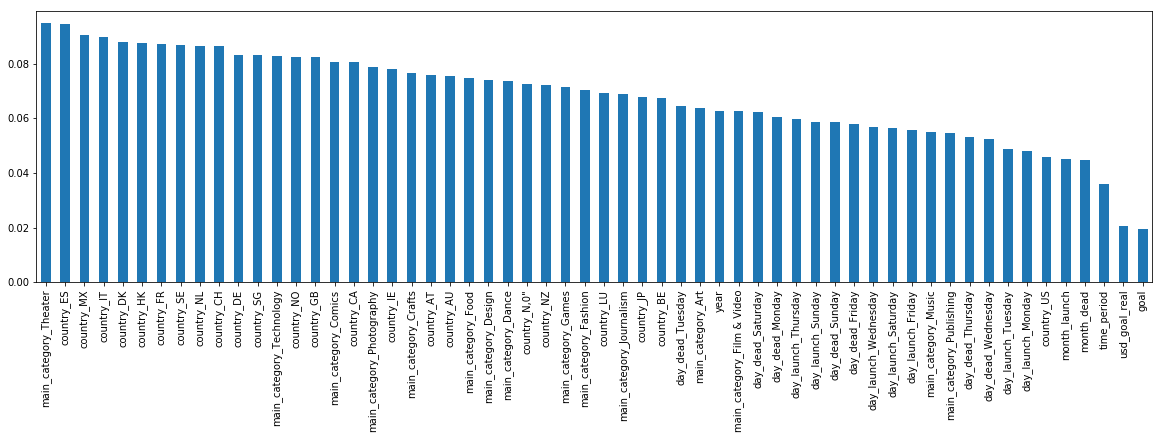

In [34]:
# Plotting feature importances
plt.figure(figsize=(20,5))
pca_51_components.mean_weight.sort_values(ascending=False).plot(kind='bar')
plt.show()

In [35]:
pipe_rf = Pipeline([('pca', PCA(n_components=51)),
                    ('clf', RandomForestClassifier())])
pipe_rf.fit(X_train, y_train)
print("Score:", round(pipe_rf.score(X_test, y_test),5))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score: 0.59485


In [38]:
pipe_best_rf = Pipeline([('pca', PCA(n_components=51)),
                    ('clf', RandomForestClassifier(max_depth=25, min_samples_split=0.001, n_estimators=100))])

pipe_best_rf.fit(X_train, y_train)

rf_y_hat_train = pipe_best_rf.predict(X_train)
rf_y_hat_test = pipe_best_rf.predict(X_test)

print("Random Forest score for training set:", round(pipe_best_rf.score(X_train, y_train),5))
print("Random Forest score for test set:", round(pipe_best_rf.score(X_test, y_test),5))


Random Forest score for training set: 0.69447
Random Forest score for test set: 0.64684

Classification report:
              precision    recall  f1-score   support

           0       0.66      0.83      0.74     59413
           1       0.60      0.38      0.46     40090

   micro avg       0.65      0.65      0.65     99503
   macro avg       0.63      0.60      0.60     99503
weighted avg       0.64      0.65      0.63     99503



C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


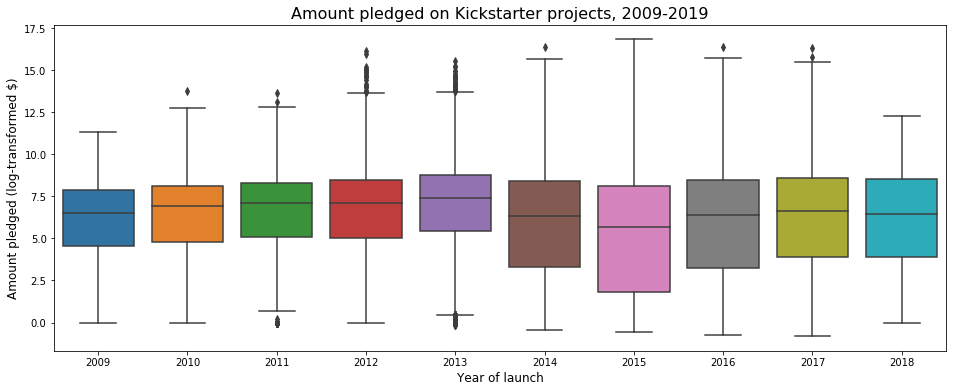

In [52]:
 #Plotting the distribution of pledged amounts each year
plt.figure(figsize=(16,6))
sns.boxplot(df.year, np.log(df.usd_pledged_real))
plt.xlabel('Year of launch', fontsize=12)
plt.ylabel('Amount pledged (log-transformed $)', fontsize=12) # Log-transforming to make the trend clearer, as the distribution is heavily positively skewed
plt.title('Amount pledged on Kickstarter projects, 2009-2019', fontsize=16)
plt.show()

## Conclusion

The accuracy of logistic model without using PCA is 62% and with it is about 64%. However, random forest model produces an accuracy of approximately 70%. 
It can be concluded that Tuesday is the best day to launch a project and to successfully gain funding of a project, one should set realistic goals with longer campaign days. It is also clear that "theatre" is the most important feature so that can be a contributing factor when deciding the category of a project